# Cheatsheet
---

# Bash

In [ ]:
! wget url -P /path/to/folder

In [ ]:
! tar xzf file -C /path/to/folder

In [ ]:
!find {TRN} -name '*.txt' | xargs cat | wc -w

# Python

In [9]:
import os
import sys

# Matplotlib

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

![Matplotlib Object Hierarchy](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

![Anatomy of a Figure](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

**Initialise Figure**

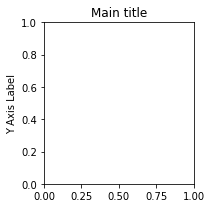

In [18]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('Main title')
ax.set_ylabel('Y Axis Label')
fig.tight_layout()

**Initialise Figure with multiple plots**

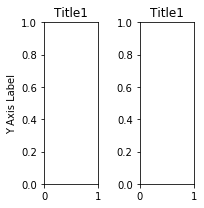

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3,3))
ax1.set_title('Title1')
ax2.set_title('Title1')
ax1.set_ylabel('Y Axis Label')
fig.tight_layout()

**Confusion Matrix**

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Numpy

In [1]:
import numpy as np

**numpy.moveaxis**

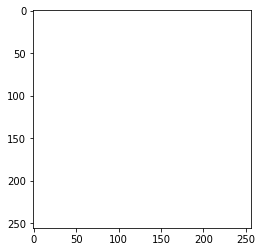

In [8]:
img = np.ones((3, 256, 256))
# move the 3 channels at the last position for imshow to work
plt.imshow(np.moveaxis(img, 0, -1))

# PyTorch

In [1]:
import torch

**Plot Training and Validation Loss**

In [3]:
def plot_loss(learner, n_skip=10, n_skip_end=5):
    '''
    plots training loss and validation loss as function of iterations. 
    '''
    fig, ax = plt.subplots()
    ax.plot(learner.sched.iterations,learner.sched.losses, label='Training Loss')
    ax.scatter(learner.sched.epochs, learner.sched.val_losses, c='red', label='Validation Loss')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.legend()
    fig.tight_layout()

**Plot change in loss function vs learning rate**

In [2]:
def plot_loss_change(sched, sma=1, n_skip=20, y_lim=(-0.01,0.01)):
    """
    Plots rate of change of the loss function.
    Parameters:
        sched - learning rate scheduler, an instance of LR_Finder class.
        sma - number of batches for simple moving average to smooth out the curve.
        n_skip - number of batches to skip on the left.
        y_lim - limits for the y axis.
    """
    derivatives = [0] * (sma + 1)
    for i in range(1 + sma, len(sched.lrs)):
        derivative = (sched.losses[i] - sched.losses[i - sma]) / sma
        derivatives.append(derivative)
        
    plt.ylabel("d/loss")
    plt.xlabel("learning rate (log scale)")
    plt.plot(sched.lrs[n_skip:], derivatives[n_skip:])
    plt.xscale('log')
    plt.ylim(y_lim)
    
    best_lr = sched.lrs[np.argmin(derivatives)]
    return best_lr

# Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [2]:
from keras.utils import np_utils

**Basic CNN**

In [ ]:
model = Sequential()
# for MNIST type inputs
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape(None, 28, 28, 1)))
model.add(Convolution2D(filters=32, kernel_size=(3,3, activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, ))